In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as wb

In [6]:
techie = ['MSFT','NFLX','FB','AMZN']
allstar = ['MSFT','PFE','F','WMT']

techie_portfolio = pd.DataFrame()
allstar_portfolio = pd.DataFrame()

for tech, all_star in zip(techie,allstar):
    techie_portfolio[tech] = wb.DataReader(tech, data_source = 'quandl', start='2013-1-1',access_key = 'AEsyGX13131WRygxRPYb')['AdjClose']
    allstar_portfolio[all_star] = wb.DataReader(all_star, data_source = 'quandl', start='2013-1-1',access_key = 'AEsyGX13131WRygxRPYb')['AdjClose']

/Users/sharduljanaskar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: the 'access_key' keyword is deprecated, use 'api_key' instead
  
/Users/sharduljanaskar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: the 'access_key' keyword is deprecated, use 'api_key' instead
  if __name__ == '__main__':


In [43]:
techie_portfolio.describe()

,MSFT,NFLX,FB,AMZN
count,1317.000000,1317.000000,1317.000000,1316.000000
mean,49.210453,98.393325,97.110507,593.412218
std,17.390396,59.980652,45.583580,315.495865
min,23.178345,13.144286,22.899000,248.230000
25%,36.374767,52.071429,63.548000,324.007500
50%,44.460153,91.840000,92.050000,505.900000
75%,59.321329,125.360000,128.090000,796.222500
max,96.770000,331.440000,193.090000,1598.390000


In [44]:
allstar_portfolio.describe()

,MSFT,PFE,F,WMT
count,1317.000000,1317.000000,1317.000000,1317.000000
mean,49.210453,29.662183,12.378503,71.497960
std,17.390396,3.714558,1.164958,9.294941
min,23.178345,21.664955,9.809217,53.284778
25%,36.374767,26.483359,11.409370,66.869788
50%,44.460153,30.274278,12.357308,69.570758
75%,59.321329,32.514522,13.268426,74.434343
max,96.770000,39.020000,14.940194,109.550000


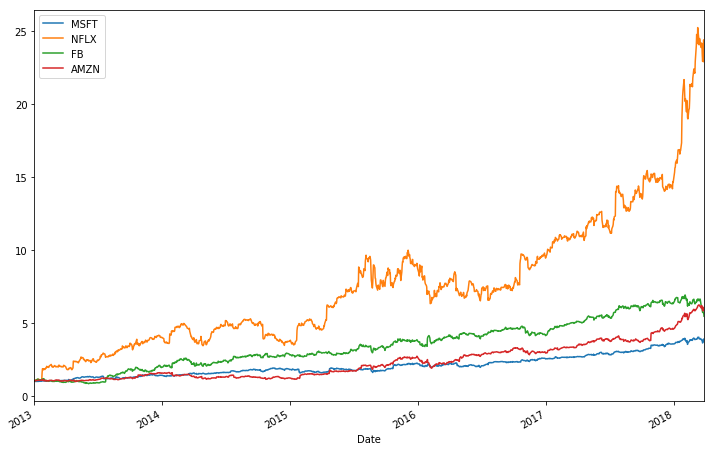

In [22]:
(techie_portfolio/techie_portfolio.iloc[-1]).plot(figsize=(12,8))
plt.show()

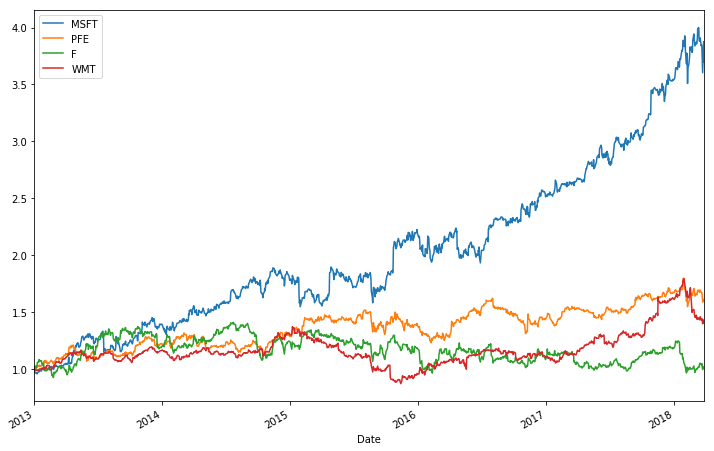

In [21]:
(allstar_portfolio/allstar_portfolio.iloc[-1]).plot(figsize=(12,8))
plt.show()

In [26]:
techie_returns = (pow(techie_portfolio.iloc[0]/techie_portfolio.iloc[-1], 1/1234) - 1) * 250
allstar_returns = (pow(allstar_portfolio.iloc[0]/allstar_portfolio.iloc[-1], 1/1234) - 1) *250

In [27]:
techie_returns

MSFT    0.265088
NFLX    0.634940
FB      0.343210
AMZN    0.357015
dtype: float64

In [28]:
weights = np.array([0.25,0.25,0.25,0.25])

techie_portfolio_return = np.dot(weights, techie_returns)
allstar_portfolio_return = np.dot(weights, allstar_returns)

print(techie_portfolio_return)
print(allstar_portfolio_return)

0.40006343055802585
0.10891281591569879


In [31]:
techie_daily_return = (techie_portfolio/techie_portfolio.shift(-1)) - 1
allstar_daily_return = (allstar_portfolio/allstar_portfolio.shift(-1)) - 1

print(techie_daily_return.head())
print(allstar_daily_return.head())

                MSFT      NFLX        FB      AMZN
Date                                              
2018-03-27 -0.045959 -0.061370 -0.049169 -0.037799
2018-03-26  0.075705  0.064498  0.004204  0.040319
2018-03-23 -0.029068 -0.018781 -0.033356 -0.031436
2018-03-22 -0.029087 -0.030902 -0.026566 -0.023871
2018-03-21 -0.006979 -0.003213  0.007374 -0.002931
                MSFT       PFE         F       WMT
Date                                              
2018-03-27 -0.045959 -0.000856  0.000000 -0.016571
2018-03-26  0.075705  0.015947  0.025568  0.024350
2018-03-23 -0.029068 -0.031180 -0.017674 -0.019738
2018-03-22 -0.029087 -0.018473 -0.031532 -0.011794
2018-03-21 -0.006979 -0.001652  0.010009  0.002615


In [33]:
covar_techie = techie_daily_return.cov() *250
covar_allstar = allstar_daily_return.cov() *250

covar_techie

,MSFT,NFLX,FB,AMZN
MSFT,0.051710,0.026222,0.023315,0.027072
NFLX,0.026222,0.225999,0.042301,0.046538
FB,0.023315,0.042301,0.103257,0.040112
AMZN,0.027072,0.046538,0.040112,0.084145


In [34]:
covar_allstar

,MSFT,PFE,F,WMT
MSFT,0.051710,0.012094,0.016697,0.009693
PFE,0.012094,0.028955,0.012136,0.009250
F,0.016697,0.012136,0.051275,0.009168
WMT,0.009693,0.009250,0.009168,0.031735


In [35]:
techie_portfolio_var = np.dot(weights.T, np.dot(covar_techie,weights))
allstar_portfolio_var = np.dot(weights.T, np.dot(covar_allstar,weights))

In [36]:
techie_portfolio_risk = techie_portfolio_var ** 0.5
allstar_portfolio_risk = allstar_portfolio_var ** 0.5

In [37]:
print(techie_portfolio_risk)
print(allstar_portfolio_risk)

0.2340178026808873
0.13732945484180006


In [38]:
rf = 0.02

sharpeRatioTechie = (techie_portfolio_return - rf)/techie_portfolio_risk
sharpeRatioAllstar = (allstar_portfolio_return - rf)/allstar_portfolio_risk

In [39]:
print(sharpeRatioTechie)
print(sharpeRatioAllstar)

1.6240791350232877
0.6474417015499262


In [46]:
import os
os.getcwd()

'/Users/sharduljanaskar'